<a href="https://colab.research.google.com/github/N2000-hack/HandWrittenTextDetection/blob/main/HandWrittenTextDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd
import numpy as np

In [33]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [34]:
import cv2 
from keras.models import Sequential #model
from keras.layers import MaxPool2D, Dense, Flatten, Conv2D, Dropout #layer
#from keras.optimizers import Adam, SGD  #optimizer -- error ostundi
from keras.optimizer_v2 import adam
from keras.optimizer_v1 import SGD
#from keras.utils import to_categorical #utilities -- error ostundi
from tensorflow.keras.utils import to_categorical #Above code ki alternative edi work avutundi
from keras.callbacks import EarlyStopping, ReduceLROnPlateau #callback - it is a set of functions applied at the given stage of the training procedure. 
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [35]:
df = pd.read_csv('/content/A_Z Handwritten Data.csv').astype('float32')
df.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,...,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617,0.618,0.619,0.620,0.621,0.622,0.623,0.624,0.625,0.626,0.627,0.628,0.629,0.630,0.631,0.632,0.633,0.634,0.635,0.636,0.637,0.638,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
x = df.drop('0', axis =1) #features
y = df['0'] #labels

In [37]:
#train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

#reshaping data
x_train = np.reshape(x_train.values , (x_train.shape[0], 28, 28))
x_test = np.reshape(x_test.values, (x_test.shape[0], 28, 28)) 

#the dataset we have it contains 784 columns pixel data which we converted into 28 X 28 pixel data 

In [38]:
print('train data shape : ', x_train.shape)
print('test data shape : ', x_test.shape)

train data shape :  (67324, 28, 28)
test data shape :  (16832, 28, 28)


In [39]:
#creating a word dict
word_dict = {0 : 'A', 1 : 'B', 2 : 'C', 3 : 'D',4: 'E',5:'F',6: 'G',7: 'H',8: 'I',9: 'J',
             10 : 'K',11: 'L',12: 'M',13: 'N',14: 'O',15: 'P',16: 'Q',
             17: 'R',18 : 'S',19: 'T',20: 'U',21: 'V',22: 'W',23: 'X',24:'Y' ,25:'Z'}
for i in word_dict:
    print(i, word_dict[i]) #values 

0 A
1 B
2 C
3 D
4 E
5 F
6 G
7 H
8 I
9 J
10 K
11 L
12 M
13 N
14 O
15 P
16 Q
17 R
18 S
19 T
20 U
21 V
22 W
23 X
24 Y
25 Z


In [40]:
#converting labels into integer
y = np.int0(y)
count = np.zeros(26, dtype = 'int')


#appending count to y
for i in y:
    count[i] = count[i] + 1
    
    
count #this count list is the number of images present in the dataset to each alphabet 

array([13869,  8668, 23409, 10134, 11440,  1163,  5762,  7218,  1120,
        1373,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0])

In [41]:
alphabets = []
for i in word_dict.values():
    alphabets.append(i)
alphabets #it contains all the values of the dictionary

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z']

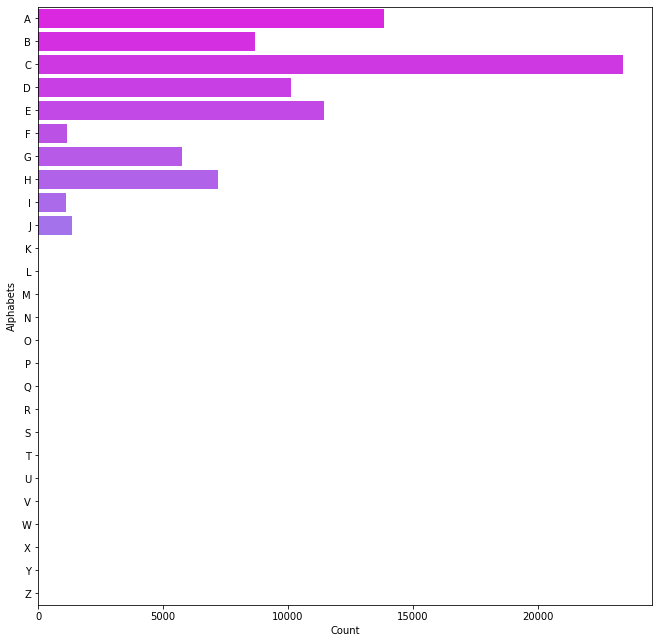

In [42]:
#plotting alphabets
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize= (11, 11))
sns.barplot(y = alphabets, x = count, palette = 'cool_r')
plt.xlabel('Count')
plt.ylabel('Alphabets')
plt.show()

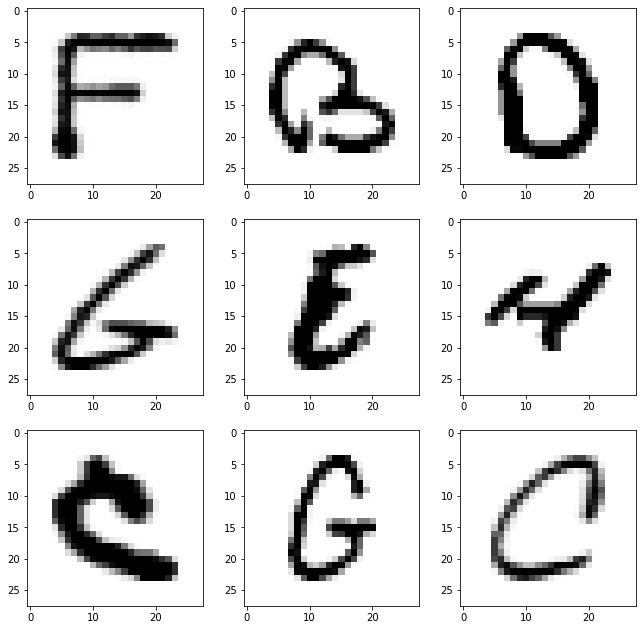

In [43]:
#shuffling
shuffle_ = shuffle(x_train[:100]) #this shuffling is for random images

fig, ax = plt.subplots(3, 3, figsize = (11,11)) #creating 9 plots in 3 X 3 shape and displaying threshold images of 9 alphabets
axes = ax.flatten()


for i in range(9): #looping
    _, shu = cv2.threshold(shuffle_[i], 30, 200, cv2.THRESH_BINARY) #setting threshold
    axes[i].imshow(np.reshape((shuffle_[i]),(28, 28)), cmap = 'Greys') #image display
plt.show()

In [44]:
#reshaping data for train and test for model input
x_train  = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
#x train reshapping
x_test  = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)

#reshapping labels
y_train = to_categorical(y_train, num_classes = 26, dtype = 'int') #converted float into categorical -- library import avale
y_test = to_categorical(y_test, num_classes = 26, dtype = 'int') #converted float into categorical -- library import avale


print('new shape of x train: ',x_train.shape)
print(' new shape of x test shape: ', x_test.shape)
print('new shape for y train : ', y_train.shape)
print('new shape for y test: ', y_test.shape)

new shape of x train:  (67324, 28, 28, 1)
 new shape of x test shape:  (16832, 28, 28, 1)
new shape for y train :  (67324, 26)
new shape for y test:  (16832, 26)


In [45]:
#MODEL CREATION
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', input_shape = (28, 28, 1))) #convolutional
model.add(MaxPool2D(pool_size = (2, 2), strides = 2)) #pooling

model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2))

model.add(Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2))

model.add(Flatten())

model.add(Dense(64, activation = 'relu')) #dense layer
model.add(Dense(128, activation = 'relu'))

model.add(Dense(26, activation = 'softmax'))

In [53]:
model.compile( optimizer = 'adam', 
               loss = 'categorical_crossentropy', metrics = ['accuracy'] )
model_fit = model.fit(x_train, y_train, epochs = 1, validation_data = (x_test, y_test))
model.summary() 

2104/2104 [==============================] - 47s 9ms/step - loss: 1.9421 - accuracy: 0.3182 - val_loss: 2.2730 - val_accuracy: 0.2757
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 6, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 128)        

In [54]:
#saving the model
model.save(r'model_hand.h5')

In [55]:
model_fit.history #this displays train and validation accuracies and losses.

{'accuracy': [0.3181777596473694],
 'loss': [1.9420838356018066],
 'val_accuracy': [0.27566540241241455],
 'val_loss': [2.2730443477630615]}

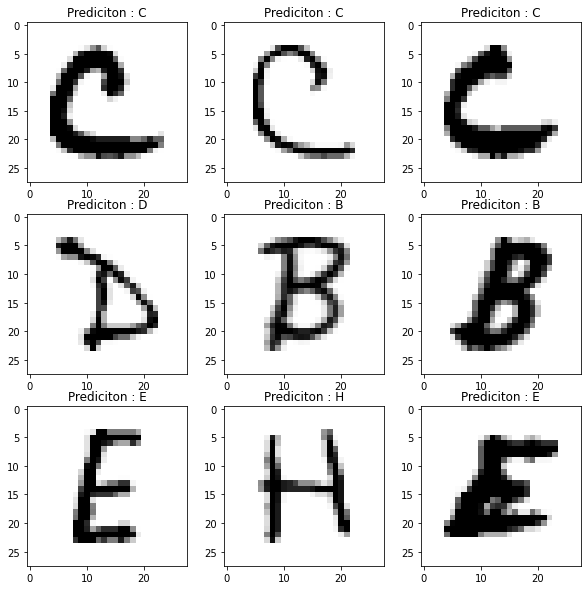

In [56]:
#prediction on test
fig, axes = plt.subplots(3, 3, figsize = (10, 10))
axes = axes.flatten()

for i, ax in enumerate(axes):
    image = np.reshape(x_test[i], (28, 28))
    ax.imshow(image, cmap = 'Greys')
    
    pred = word_dict[np.argmax(y_test[i])]
    ax.set_title('Prediciton : ' +pred)